# To predict future price of a stock using Random forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import math
#from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv('IDFCFIRSTB.NS.csv')
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-06,70.500000,73.400002,67.000000,70.400002,67.804970,22781516
2015-11-09,67.750000,68.000000,66.900002,66.949997,64.482140,10010231
2015-11-10,66.500000,66.500000,64.099998,64.550003,62.170612,10736961
2015-11-13,65.849998,65.849998,63.000000,63.500000,61.159309,6771668
2015-11-16,63.450001,65.500000,62.000000,65.000000,62.604019,5640610
...,...,...,...,...,...,...
2023-09-28,97.650002,98.400002,93.650002,94.550003,94.550003,52996232
2023-09-29,95.150002,95.900002,94.199997,95.500000,95.500000,21360102
2023-10-03,95.650002,95.650002,93.550003,94.150002,94.150002,20336030


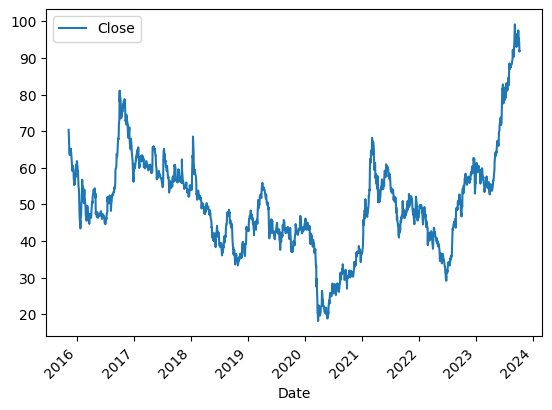

In [6]:
# Visualise the original data

df.plot(y="Close")
plt.xticks(rotation=45)
plt.show()

In [7]:
#Create the model
model = RandomForestRegressor()


In [8]:
#Train the model
X= df[['Open','High','Low','Volume']]
X= X[:int(len(df)-1)] #all rows except last
Y = df['Close']
Y = Y[:int(len(df)-1)] #all rows except last

model.fit(X,Y)

RandomForestRegressor()

In [9]:
# test the model on training dataset
predictions = model.predict(X)
print('The model Score is:', model.score(X,Y))

The model Score is: 0.9997769624383782


In [10]:
#make the predictions
new_data =df[['Open','High','Low','Volume']].tail(1)
new_predict =model.predict(new_data)
print('The model predicts the last row',new_predict)
print('Actual value is',df[['Close']].tail(1).values[0][0])

The model predicts the last row [91.78899908]
Actual value is 91.949997
